In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-complete-dataset-20082020/matches.csv
/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv')
df2=pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/matches.csv')

In [4]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
df2.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
print(df1.columns)
print(df2.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


In [7]:
print(df1.shape)
print(df2.shape)

(260920, 17)
(1095, 20)


In [8]:
#data Cleaning
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [9]:
df2.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [10]:
df1['extras_type']=df1['extras_type'].fillna('None')

In [11]:
df1['player_dismissed']=df1['player_dismissed'].fillna('None')

In [12]:
df1['dismissal_kind']=df1['dismissal_kind'].fillna('None')

In [13]:
df1['fielder']=df1['fielder'].fillna('None')

In [14]:
df1.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [15]:
df2['city']=df2['city'].fillna('None')

In [16]:
df2['player_of_match']=df2['player_of_match'].fillna('None')

In [17]:
df2['winner']=df2['winner'].fillna('None')

In [18]:
df2['result_margin']=df2['result_margin'].fillna('None')

In [19]:
df2['target_runs']=df2['target_runs'].fillna('None')

In [20]:
df2['target_overs']=df2['target_overs'].fillna('None')

In [21]:
df2['method']=df2['method'].fillna('None')

In [22]:
df2.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [23]:
df1.duplicated().sum()


0

In [24]:
df2.duplicated().sum()

0

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1095 non-null   int64 
 1   season           1095 non-null   object
 2   city             1095 non-null   object
 3   date             1095 non-null   object
 4   match_type       1095 non-null   object
 5   player_of_match  1095 non-null   object
 6   venue            1095 non-null   object
 7   team1            1095 non-null   object
 8   team2            1095 non-null   object
 9   toss_winner      1095 non-null   object
 10  toss_decision    1095 non-null   object
 11  winner           1095 non-null   object
 12  result           1095 non-null   object
 13  result_margin    1095 non-null   object
 14  target_runs      1095 non-null   object
 15  target_overs     1095 non-null   object
 16  super_over       1095 non-null   object
 17  method           1095 non-null   

<Axes: title={'center': 'Total Matches Per Season'}, xlabel='season'>

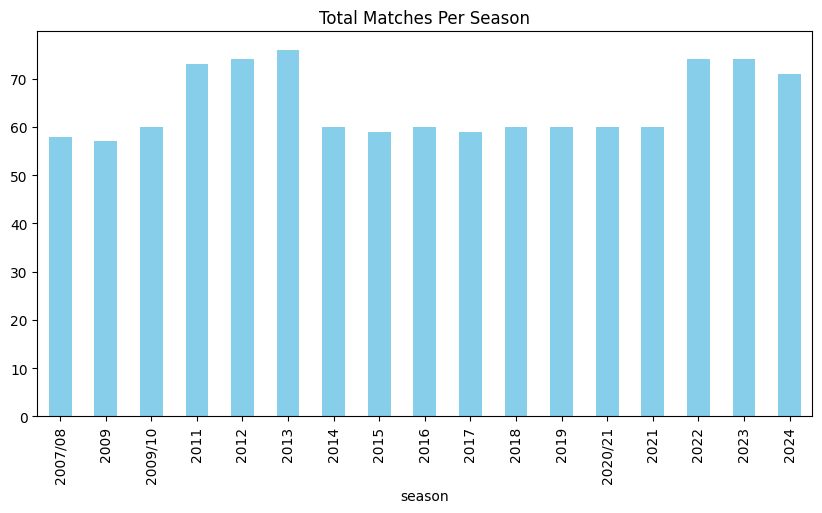

In [27]:
#Total mathes played per season
df2['season'].value_counts().sort_index().plot(kind='bar', title='Total Matches Per Season', figsize=(10,5), color='skyblue')


<Axes: title={'center': 'Most Successful Teams'}, ylabel='winner'>

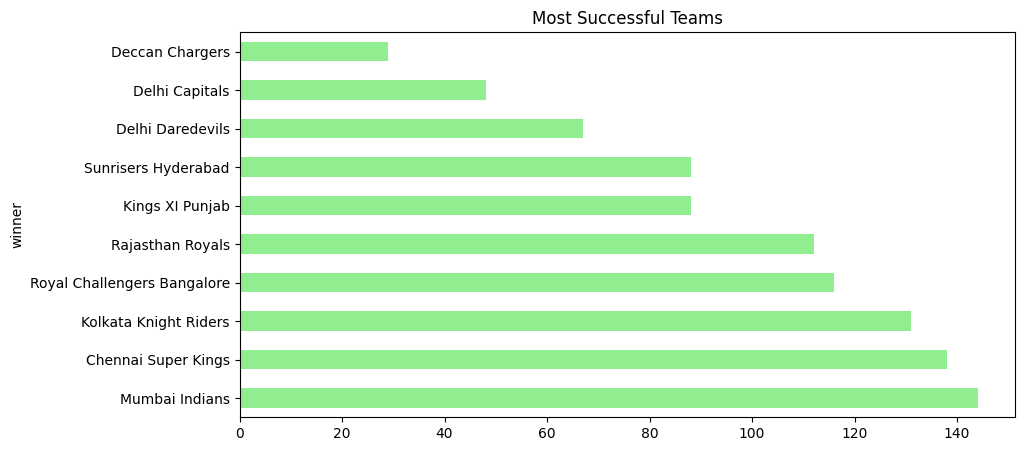

In [28]:
#most Successful Teams
df2['winner'].value_counts().head(10).plot(kind='barh', title='Most Successful Teams', figsize=(10,5), color='lightgreen')

In [29]:
# toss winners vs match winners how often same
same = (df2['toss_winner'] == df2['winner']).sum()
total = len(df2)
print(f"Toss winner also won the match {same}/{total} times ({(same/total)*100:.2f}%)")


Toss winner also won the match 554/1095 times (50.59%)


<Axes: title={'center': 'Top Toss-Winning Teams'}, xlabel='toss_winner'>

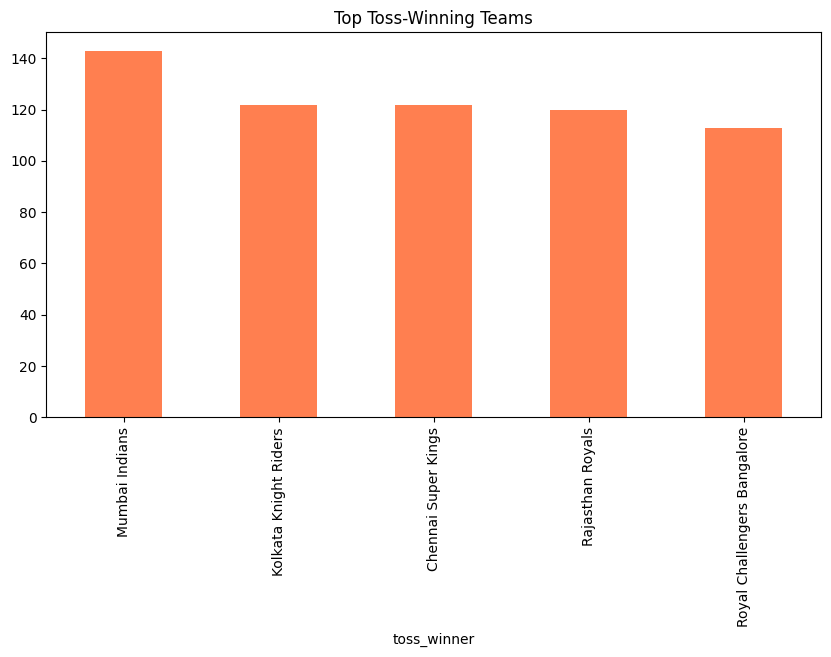

In [30]:
#team with most toss wins
df2['toss_winner'].value_counts().head(5).plot(kind='bar', title='Top Toss-Winning Teams', figsize=(10,5), color='coral')


<Axes: title={'center': 'most popular venues'}, xlabel='venue'>

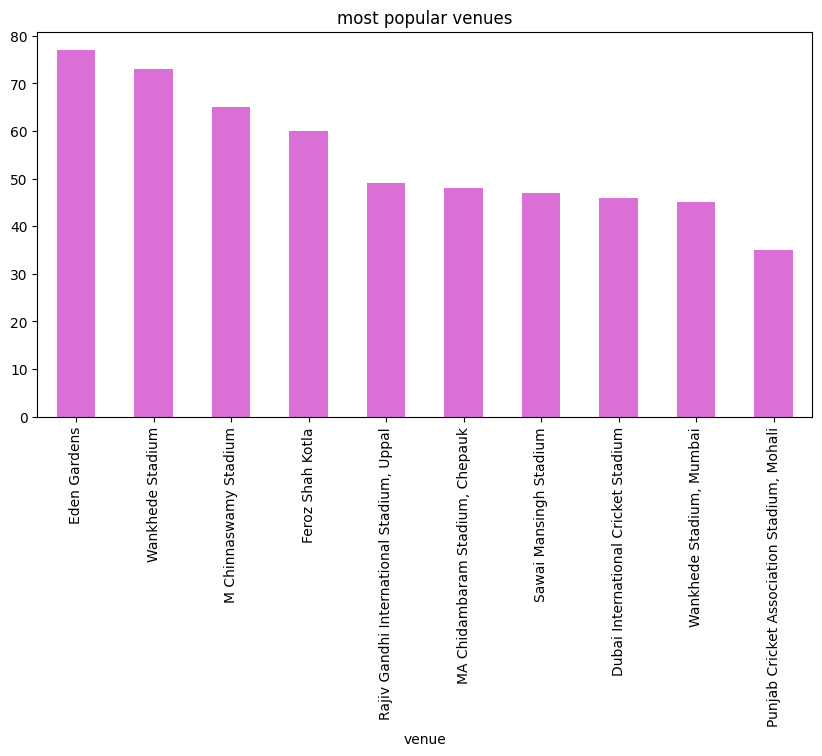

In [31]:
#top venues by number of mathes
df2['venue'].value_counts().head(10).plot(kind='bar', title='most popular venues', figsize=(10,5), color='orchid')

In [32]:
#most runs scored by player
most_runs=df1.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
most_runs

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

<Axes: title={'center': 'most runs by player'}, xlabel='batter'>

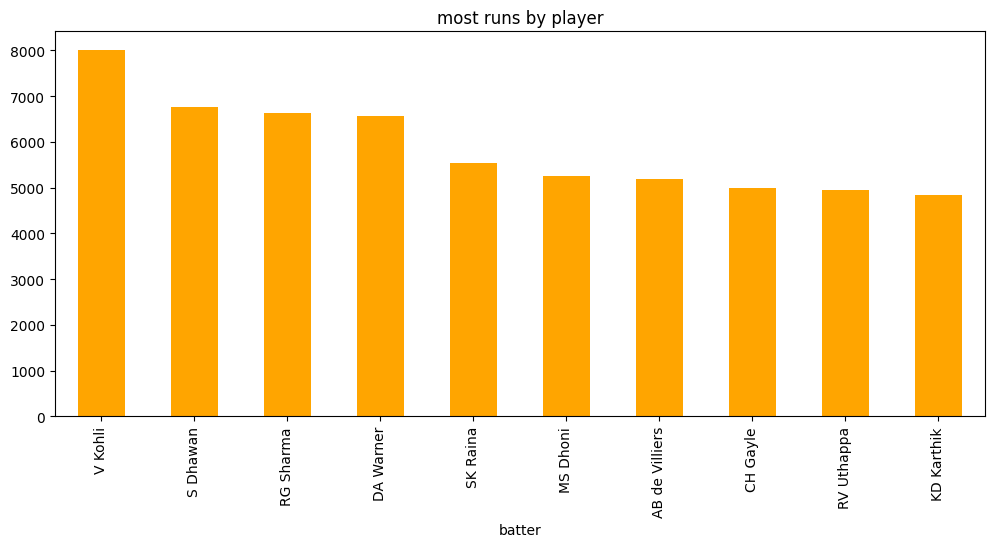

In [33]:
most_runs.plot(kind='bar', title='most runs by player', figsize=(12,5), color='orange')

<Axes: title={'center': 'most wicket by bowler'}, xlabel='bowler'>

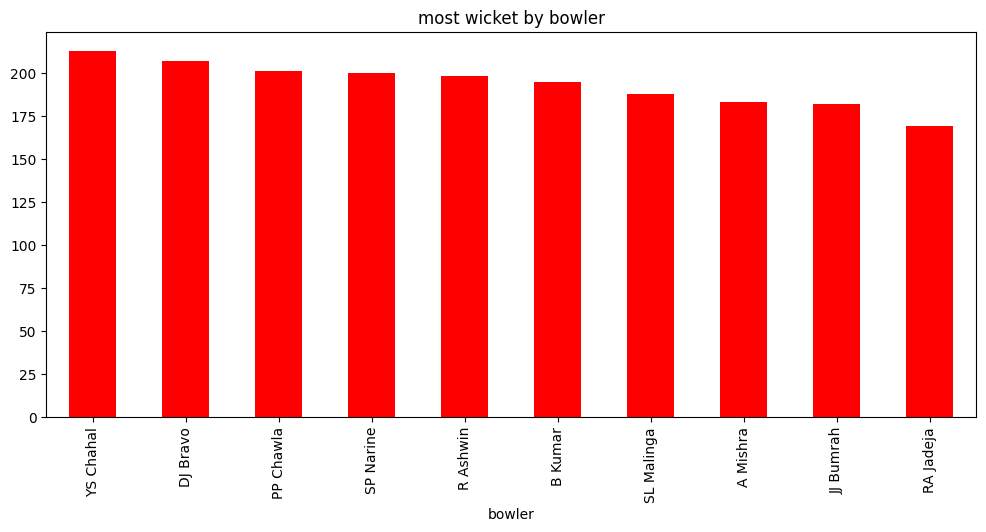

In [34]:
#most wickets taken by bowler
df1[df1['is_wicket']==1]['bowler'].value_counts().head(10).plot(kind='bar', title='most wicket by bowler', figsize=(12,5), color='red')

<Axes: title={'center': 'Highest Strike Rate (min 200 balls)'}, xlabel='batter'>

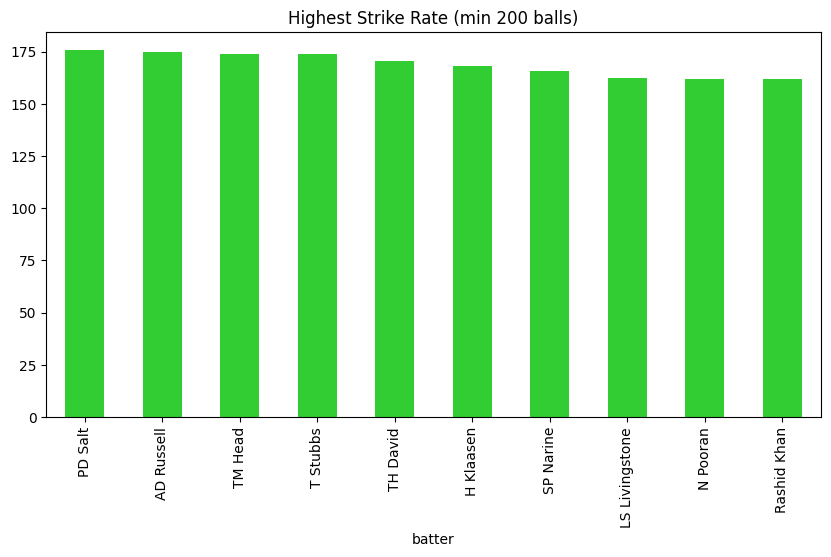

In [35]:
#highest strikerate
balls_faced = df1[df1['extras_type'] != 'wides'].groupby('batter').size()
runs = df1.groupby('batter')['batsman_runs'].sum()
strike_rate = (runs / balls_faced) * 100
strike_rate[balls_faced > 200].sort_values(ascending=False).head(10).plot(kind='bar', title='Highest Strike Rate (min 200 balls)', figsize=(10,5), color='limegreen')


<Axes: title={'center': 'Most Economical Bowlers (min 300 balls)'}, xlabel='bowler'>

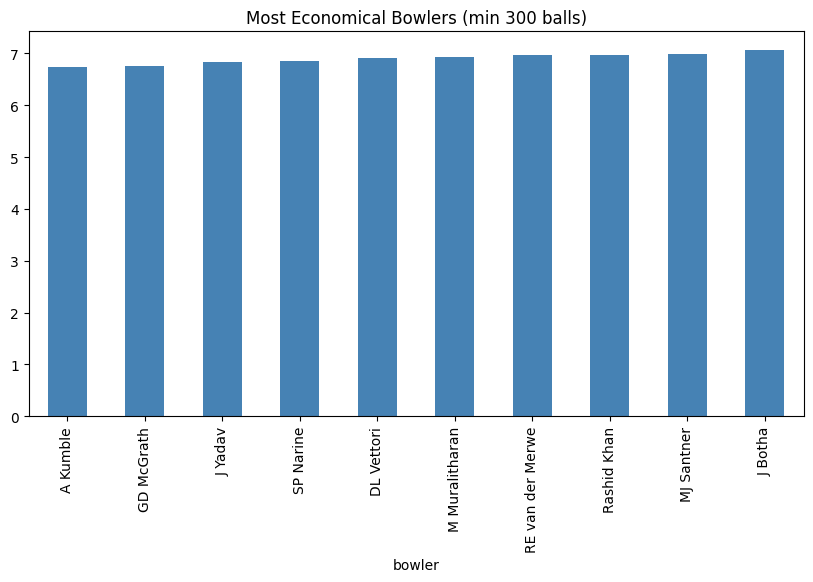

In [36]:
# best economy rate
balls_bowled = df1[df1['extras_type'] != 'wides'].groupby('bowler').size()
runs_given = df1.groupby('bowler')['total_runs'].sum()
economy = (runs_given / balls_bowled) * 6
economy[balls_bowled > 300].sort_values().head(10).plot(kind='bar', title='Most Economical Bowlers (min 300 balls)', figsize=(10,5), color='steelblue')


In [37]:
# Orange Cap (most runs) by season
orange_cap = df1.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
merged = orange_cap.merge(df2[['id', 'season']], left_on='match_id', right_on='id')
orange_by_season = merged.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
orange_cap_winners = orange_by_season.sort_values(['season','batsman_runs'], ascending=[True, False]).drop_duplicates('season')
print("Orange Cap Winners by Season:\n", orange_cap_winners[['season', 'batter', 'batsman_runs']])

# Purple Cap (most wickets) by season
wickets = df1[df1['is_wicket'] == 1].groupby(['match_id', 'bowler']).size().reset_index(name='wickets')
merged2 = wickets.merge(df2[['id', 'season']], left_on='match_id', right_on='id')
purple_by_season = merged2.groupby(['season', 'bowler'])['wickets'].sum().reset_index()
purple_cap_winners = purple_by_season.sort_values(['season','wickets'], ascending=[True, False]).drop_duplicates('season')
print("Purple Cap Winners by Season:\n", purple_cap_winners[['season', 'bowler', 'wickets']])


Orange Cap Winners by Season:
        season         batter  batsman_runs
115   2007/08       SE Marsh           616
229      2009      ML Hayden           572
446   2009/10   SR Tendulkar           618
502      2011       CH Gayle           608
684      2012       CH Gayle           733
910      2013     MEK Hussey           733
1088     2014     RV Uthappa           660
1148     2015      DA Warner           562
1383     2016        V Kohli           973
1422     2017      DA Warner           641
1594     2018  KS Williamson           735
1694     2019      DA Warner           692
1866  2020/21       KL Rahul           676
2051     2021     RD Gaikwad           635
2144     2022     JC Buttler           863
2423     2023   Shubman Gill           890
2606     2024        V Kohli           741
Purple Cap Winners by Season:
        season         bowler  wickets
77    2007/08  Sohail Tanvir       24
157      2009       RP Singh       26
248   2009/10        PP Ojha       22
375      201

Batting First Wins: 554
Batting Second Wins: 536


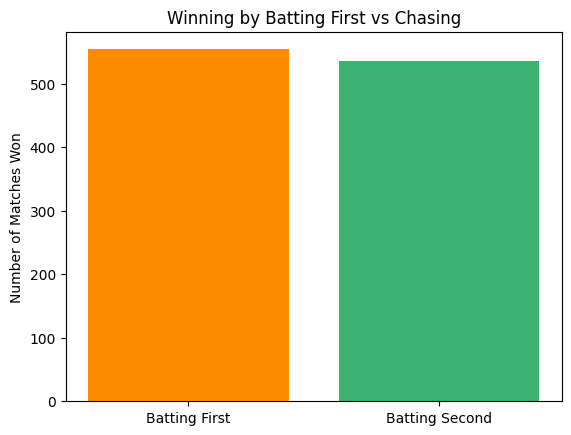

In [38]:
#  Batting First vs Chasing: Which Wins More?

df2['bat_first'] = df2['toss_winner']
df2['bat_second'] = df2.apply(lambda row: row['team2'] if row['toss_winner'] == row['team1'] else row['team1'], axis=1)
df2['bat_first_won'] = df2['winner'] == df2['bat_first']
df2['bat_second_won'] = df2['winner'] == df2['bat_second']

print("Batting First Wins:", df2['bat_first_won'].sum())
print("Batting Second Wins:", df2['bat_second_won'].sum())

plt.bar(['Batting First', 'Batting Second'], [df2['bat_first_won'].sum(), df2['bat_second_won'].sum()], color=['darkorange', 'mediumseagreen'])
plt.title('Winning by Batting First vs Chasing')
plt.ylabel('Number of Matches Won')
plt.show()


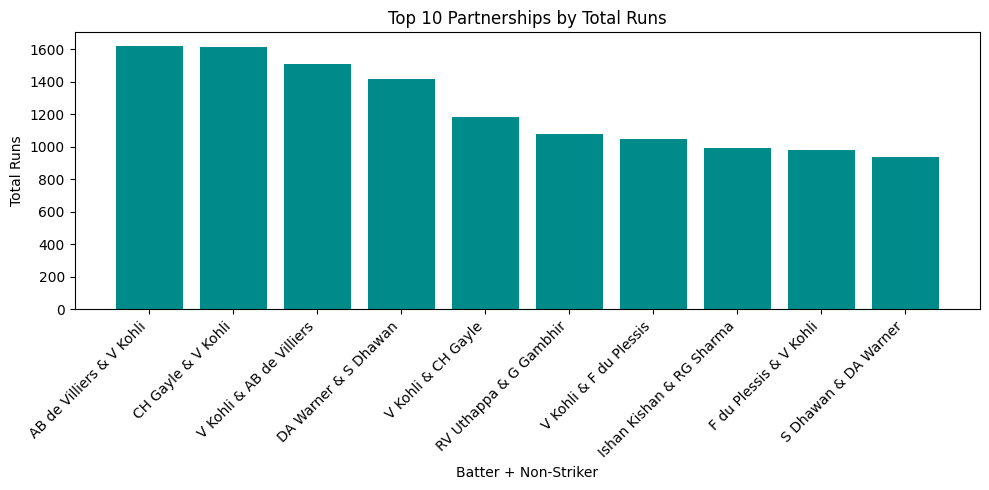

In [39]:
# Partnerships (Batter + Non-Striker Total Runs)
partnerships = df1.groupby(['batter', 'non_striker'])['total_runs'].sum().reset_index()
best_partnerships = partnerships.sort_values(by='total_runs', ascending=False).head(10)

best_partnerships['pair'] = best_partnerships['batter'] + ' & ' + best_partnerships['non_striker']

plt.figure(figsize=(10,5))
plt.bar(best_partnerships['pair'], best_partnerships['total_runs'], color='darkcyan')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Partnerships by Total Runs')
plt.xlabel('Batter + Non-Striker')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()


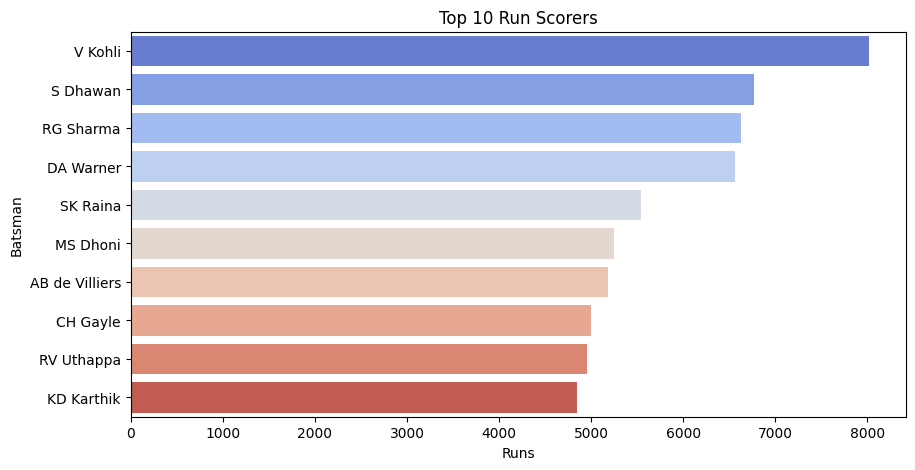

In [40]:
#Data Visualization
#  Top 10 Batsmen by Total Runs
top_batsmen = df1.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='coolwarm')
plt.title("Top 10 Run Scorers")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.show()

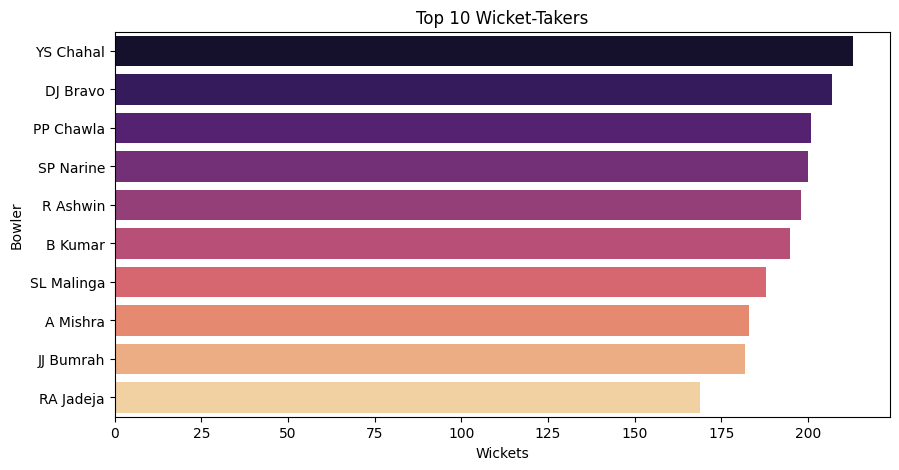

In [41]:
#  Top 10 Bowlers by Wickets
top_bowlers = df1[df1['is_wicket'] == 1]['bowler'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='magma')
plt.title("Top 10 Wicket-Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()


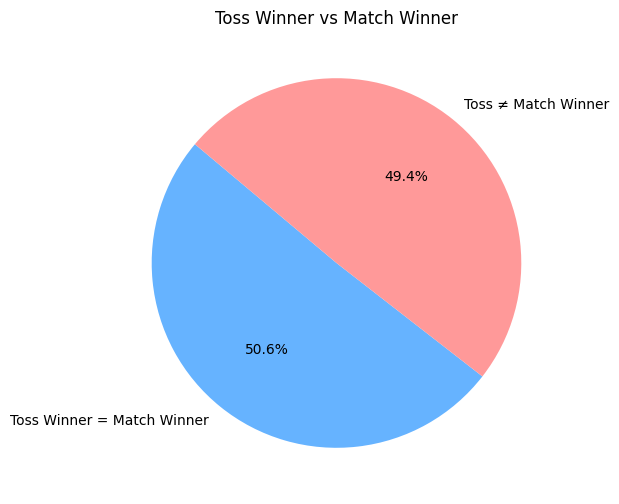

In [42]:
# pie chart toss winners vs match winners
toss_match_same = (df2['toss_winner'] == df2['winner']).sum()
toss_match_diff = len(df2) - toss_match_same

plt.figure(figsize=(6,6))
plt.pie([toss_match_same, toss_match_diff], labels=['Toss Winner = Match Winner', 'Toss ≠ Match Winner'],
        autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title("Toss Winner vs Match Winner")
plt.show()


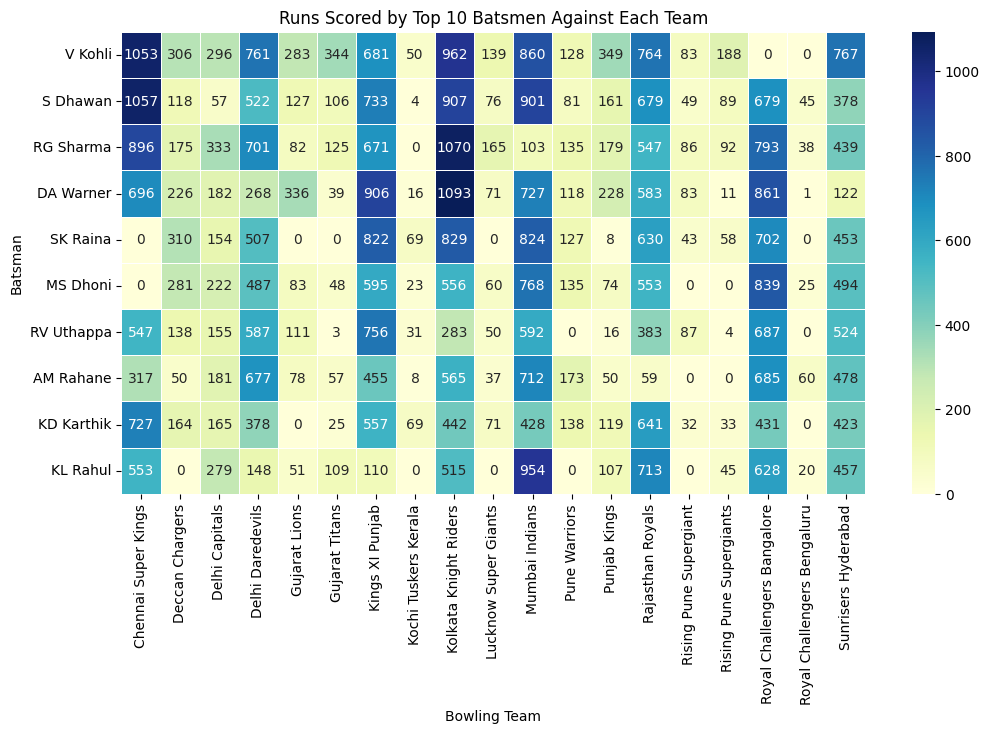

In [43]:
# Heatmap: Player vs Team Performance (Batsman Runs vs Bowling Team)
pivot = df1.pivot_table(index='batter', columns='bowling_team', values='batsman_runs', aggfunc='sum', fill_value=0)

top10_batsmen = df1['batter'].value_counts().head(10).index
top_pivot = pivot.loc[top10_batsmen]

plt.figure(figsize=(12,6))
sns.heatmap(top_pivot, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d')
plt.title("Runs Scored by Top 10 Batsmen Against Each Team")
plt.xlabel("Bowling Team")
plt.ylabel("Batsman")
plt.show()


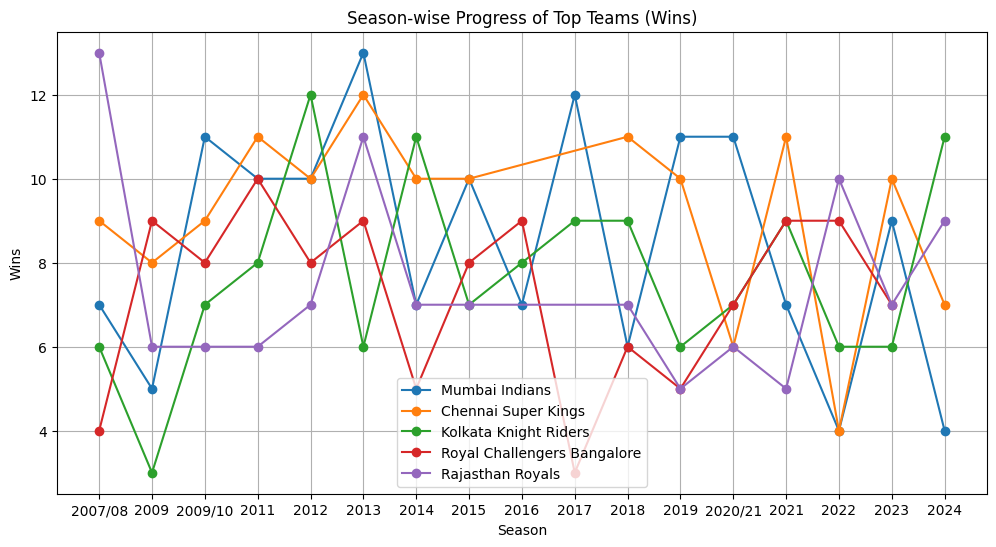

In [44]:
# Line Chart: Team Wins Over the Seasons
team_season_wins = df2.groupby(['season', 'winner']).size().reset_index(name='wins')
top_teams = df2['winner'].value_counts().head(5).index 

plt.figure(figsize=(12,6))
for team in top_teams:
    team_data = team_season_wins[team_season_wins['winner'] == team]
    plt.plot(team_data['season'], team_data['wins'], marker='o', label=team)

plt.title("Season-wise Progress of Top Teams (Wins)")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.legend()
plt.grid(True)
plt.show()



In [45]:
#hypothesis
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df2['toss_winner'] == df2['winner'], columns="Count")
contingency_table.index = ['Toss ≠ Match Win', 'Toss = Match Win']
print(contingency_table)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject Null Hypothesis: Toss winner has significant advantage.")
else:
    print("Fail to Reject Null Hypothesis: Toss winner has no significant advantage.")


col_0             Count
Toss ≠ Match Win    541
Toss = Match Win    554
Chi-Square Statistic: 0.0
P-value: 1.0
Fail to Reject Null Hypothesis: Toss winner has no significant advantage.
